In [6]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
import geopandas as gpd

In [ ]:
df_barris = pd.read_csv('data/HABITATGE_LLOGUER_BARRIS_25.csv', delimiter=';')
df_barris

str

In [5]:
df_barris.head()

,ID,BARRI,BARRI_BCN,CONTRAC,CONT1000H,VARCONTR,TRAMLLOG,LLOGUER,VARLLOG,LLOGTRIM,SUPMITJ,PREUM2,PREUM2TRIM,GEOMETRIA
0,1,1,el Raval,555,21.983315,-9.016393,> 850 i <= 1000 euros/mes,944.205604,-4.555778,969.902984,60.693694,16.335153,16.626306,MULTIPOLYGON (((430607.335454264 4581881.57694...
1,2,2,el Barri Gòtic,269,19.092396,7.171315,> 1000 euros/mes,1205.260818,-1.030824,1276.712366,85.072727,16.485631,16.341041,MULTIPOLYGON (((431641.334436453 4581405.51038...
2,3,3,la Barceloneta,209,21.227406,88.288288,> 850 i <= 1000 euros/mes,902.107273,-14.397992,956.745773,45.227273,22.322604,22.387558,MULTIPOLYGON (((433088.289657605 4581798.87002...
3,17,17,Sants - Badal,251,19.207092,-5.283019,> 850 i <= 1000 euros/mes,926.416375,-4.633878,915.222826,58.722222,16.029918,16.406279,MULTIPOLYGON (((427385.147094413 4580381.23113...
4,18,18,Sants,445,19.861598,-8.811475,> 850 i <= 1000 euros/mes,982.919348,-4.791220,1003.903860,64.510204,15.865071,16.106829,MULTIPOLYGON (((428338.31375162 4581328.092342...


In [34]:


df_district_barri = pd.DataFrame([
    # CIUTAT VELLA
    ("CIUTAT VELLA", "el Raval  "),
    ("CIUTAT VELLA", "el Barri Gòtic  "),
    ("CIUTAT VELLA", "la Barceloneta  "),
    ("CIUTAT VELLA", "Sant Pere, Santa Caterina i la Ribera  "),

    # EIXAMPLE
    ("EIXAMPLE", "el Fort Pienc  "),
    ("EIXAMPLE", "la Sagrada Família  "),
    ("EIXAMPLE", "la Dreta de l'Eixample  "),
    ("EIXAMPLE", "l'Antiga Esquerra de l'Eixample  "),
    ("EIXAMPLE", "la Nova Esquerra de l'Eixample  "),
    ("EIXAMPLE", "Sant Antoni  "),

    # SANTS - MONTJUÏC
    ("SANTS - MONTJUÏC", "el Poble Sec"),
    ("SANTS - MONTJUÏC", "la Marina del Prat Vermell"),
    ("SANTS - MONTJUÏC", "la Marina de Port  "),
    ("SANTS - MONTJUÏC", "la Font de la Guatlla  "),
    ("SANTS - MONTJUÏC", "Hostafrancs  "),
    ("SANTS - MONTJUÏC", "la Bordeta  "),
    ("SANTS - MONTJUÏC", "Sants  "),
    ("SANTS - MONTJUÏC", "Sants - Badal  "),

    # LES CORTS
    ("LES CORTS", "les Corts  "),
    ("LES CORTS", "la Maternitat i Sant Ramon  "),
    ("LES CORTS", "Pedralbes  "),

    # SARRIÀ - SANT GERVASI
    ("SARRIÀ - SANT GERVASI", "Sarrià  "),
    ("SARRIÀ - SANT GERVASI", "les Tres Torres  "),
    ("SARRIÀ - SANT GERVASI", "Sant Gervasi - la Bonanova  "),
    ("SARRIÀ - SANT GERVASI", "Sant Gervasi - Galvany  "),
    ("SARRIÀ - SANT GERVASI", "el Putxet i el Farró  "),
    ("SARRIÀ - SANT GERVASI", "Vallvidrera, el Tibidabo i les Planes  "),

    # GRÀCIA
    ("GRÀCIA", "la Salut  "),
    ("GRÀCIA", "la Vila de Gràcia  "),
    ("GRÀCIA", "el Camp d'en Grassot i Gràcia Nova  "),
    ("GRÀCIA", "el Coll  "),
    ("GRÀCIA", "Vallcarca i els Penitents  "),

    # HORTA - GUINARDÓ
    ("HORTA - GUINARDÓ", "el Baix Guinardó  "),
    ("HORTA - GUINARDÓ", "Can Baró  "),
    ("HORTA - GUINARDÓ", "el Guinardó  "),
    ("HORTA - GUINARDÓ", "la Font d'en Fargues  "),
    ("HORTA - GUINARDÓ", "el Carmel  "),
    ("HORTA - GUINARDÓ", "la Teixonera  "),
    ("HORTA - GUINARDÓ", "Sant Genís dels Agudells  "),
    ("HORTA - GUINARDÓ", "Montbau  "),
    ("HORTA - GUINARDÓ", "la Vall d'Hebron  "),
    ("HORTA - GUINARDÓ", "la Clota  "),
    ("HORTA - GUINARDÓ", "Horta  "),

    # NOU BARRIS
    ("NOU BARRIS", "Vilapicina i la Torre Llobeta  "),
    ("NOU BARRIS", "la Guineueta  "),
    ("NOU BARRIS", "les Roquetes  "),
    ("NOU BARRIS", "Porta  "),
    ("NOU BARRIS", "el Turó de la Peira  "),
    ("NOU BARRIS", "Can Peguera  "),
    ("NOU BARRIS", "Canyelles  "),
    ("NOU BARRIS", "Verdun  "),
    ("NOU BARRIS", "la Prosperitat  "),
    ("NOU BARRIS", "la Trinitat Nova  "),
    ("NOU BARRIS", "Torre Baró  "),
    ("NOU BARRIS", "Ciutat Meridiana  "),
    ("NOU BARRIS", "Vallbona  "),

    # SANT ANDREU
    ("SANT ANDREU", "la Trinitat Vella  "),
    ("SANT ANDREU", "Baró de Viver  "),
    ("SANT ANDREU", "el Bon Pastor  "),
    ("SANT ANDREU", "Sant Andreu  "),
    ("SANT ANDREU", "la Sagrera  "),
    ("SANT ANDREU", "el Congrés i els Indians  "),
    ("SANT ANDREU", "Navas  "),

    # SANT MARTÍ
    ("SANT MARTÍ", "el Camp de l'Arpa del Clot  "),
    ("SANT MARTÍ", "el Clot  "),
    ("SANT MARTÍ", "el Parc i la Llacuna del Poblenou  "),
    ("SANT MARTÍ", "la Vila Olímpica del Poblenou  "),
    ("SANT MARTÍ", "el Poblenou  "),
    ("SANT MARTÍ", "Diagonal Mar i el Front Marítim del Poblenou  "),
    ("SANT MARTÍ", "el Besòs i el Maresme  "),
    ("SANT MARTÍ", "Provençals del Poblenou  "),
    ("SANT MARTÍ", "Sant Martí de Provençals  "),
    ("SANT MARTÍ", "la Verneda i la Pau  "),
], columns=["Districte", "BARRI_BCN"])

# Normalizar espacios en los nombres de barrios
df_barris["BARRI_BCN"] = df_barris["BARRI_BCN"].str.strip()
df_district_barri["BARRI_BCN"] = df_district_barri["BARRI_BCN"].str.strip()


df_district_barri


,Districte,BARRI_BCN
0,CIUTAT VELLA,el Raval
1,CIUTAT VELLA,el Barri Gòtic
2,CIUTAT VELLA,la Barceloneta
3,CIUTAT VELLA,"Sant Pere, Santa Caterina i la Ribera"
4,EIXAMPLE,el Fort Pienc
...,...,...
68,SANT MARTÍ,Diagonal Mar i el Front Marítim del Poblenou
69,SANT MARTÍ,el Besòs i el Maresme
70,SANT MARTÍ,Provençals del Poblenou
71,SANT MARTÍ,Sant Martí de Provençals


In [14]:
df_data = pd.read_csv('data/data_aprobados_colegio_barrio_2022.csv', delimiter=';', encoding='latin1')

df_bcn = df_data[df_data['Municipi'] == 'BARCELONA']

df_bcn_filtered=df_bcn[["Codi districte","Naturalesa","Resultat de l'avaluació", 'Alumnes avaluats']].copy()

df_bcn_filtered['Codi districte']=df_bcn_filtered['Codi districte']-801900

df_resultados_distrito = df_bcn_filtered.groupby(
        ["Codi districte", "Naturalesa", "Resultat de l'avaluació"]
    )["Alumnes avaluats"].sum().reset_index()

df_resultados_distrito["porcentaje"] = (
    df_resultados_distrito["Alumnes avaluats"] /
    df_resultados_distrito.groupby(["Codi districte", "Naturalesa"])["Alumnes avaluats"].transform("sum")
    * 100
)


df_resultados_distrito






,Codi districte,Naturalesa,Resultat de l'avaluació,Alumnes avaluats,porcentaje
0,1,PRIVAT,NO PROMOCIONEN,71,7.593583
1,1,PRIVAT,PROMOCIONEN AMB PENDENTS,162,17.326203
2,1,PRIVAT,PROMOCIONEN SENSE PENDENTS,702,75.080214
3,1,PÚBLIC,NO PROMOCIONEN,80,6.015038
4,1,PÚBLIC,PROMOCIONEN AMB PENDENTS,467,35.112782
5,1,PÚBLIC,PROMOCIONEN SENSE PENDENTS,783,58.872180
6,2,PRIVAT,NO PROMOCIONEN,159,3.073652
7,2,PRIVAT,PROMOCIONEN AMB PENDENTS,637,12.313938
8,2,PRIVAT,PROMOCIONEN SENSE PENDENTS,4377,84.612411
9,2,PÚBLIC,NO PROMOCIONEN,129,5.408805


In [10]:
 
df_bcn_disctricts=gpd.read_file('barcelona_districts_clean.geojson')

df_bcn_disctricts

,Codi_Districte,nom_districte,geometria_etrs89,geometria_wgs84,geometry
0,1,Ciutat Vella,"POLYGON ((431733.736 4582441.816, 431557.5115 ...","POLYGON ((2.18345134701381 41.3906119681235, 2...","POLYGON ((2.18345 41.39061, 2.18132 41.39222, ..."
1,2,Eixample,"POLYGON ((432033.1836 4583665.0318, 431837.083...","POLYGON ((2.18689546486771 41.4016544763739, 2...","POLYGON ((2.1869 41.40165, 2.18453 41.40345, 2..."
2,3,Sants-Montjuïc,"MULTIPOLYGON (((431001.6 4577921.76, 430999.65...",MULTIPOLYGON (((2.17520933722813 41.3498386054...,"MULTIPOLYGON (((2.17521 41.34984, 2.17519 41.3..."
3,4,Les Corts,"POLYGON ((425054.6701 4583672.5601, 425047.220...","POLYGON ((2.10341813050026 41.4011020711442, 2...","POLYGON ((2.10342 41.4011, 2.10333 41.40111, 2..."
4,5,Sarrià-Sant Gervasi,"MULTIPOLYGON (((421380.6 4587521.9, 421367.7 4...",MULTIPOLYGON (((2.05896991836021 41.4354197742...,"MULTIPOLYGON (((2.05897 41.43542, 2.05881 41.4..."
5,6,Gràcia,"POLYGON ((427826.9875 4586145.3555, 427820.695...","POLYGON ((2.13628510980215 41.4236271044924, 2...","POLYGON ((2.13629 41.42363, 2.13621 41.42368, ..."
6,7,Horta-Guinardó,"POLYGON ((426501.8675 4586067.1195, 426500.790...","POLYGON ((2.12043830984154 41.42280233558, 2.1...","POLYGON ((2.12044 41.4228, 2.12043 41.42272, 2..."
7,8,Nou Barris,"POLYGON ((429473.8345 4588578.6005, 429473.817...","POLYGON ((2.15570736657204 41.4456885714351, 2...","POLYGON ((2.15571 41.44569, 2.15571 41.44565, ..."
8,9,Sant Andreu,"POLYGON ((432158.516094 4590377.238359, 432142...","POLYGON ((2.18764133625936 41.4621195893617, 2...","POLYGON ((2.18764 41.46212, 2.18744 41.46208, ..."
9,10,Sant Martí,"POLYGON ((433770.0227 4586475.3618, 433726.353...","POLYGON ((2.20736412230993 41.4271112956681, 2...","POLYGON ((2.20736 41.42711, 2.20684 41.42736, ..."


C:\Users\anica\AppData\Local\Temp\ipykernel_21748\542790843.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  publicos["Codi districte"] = publicos["Codi districte"].astype(int)
C:\Users\anica\AppData\Local\Temp\ipykernel_21748\542790843.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  privados["Codi districte"] = privados["Codi districte"].astype(int)


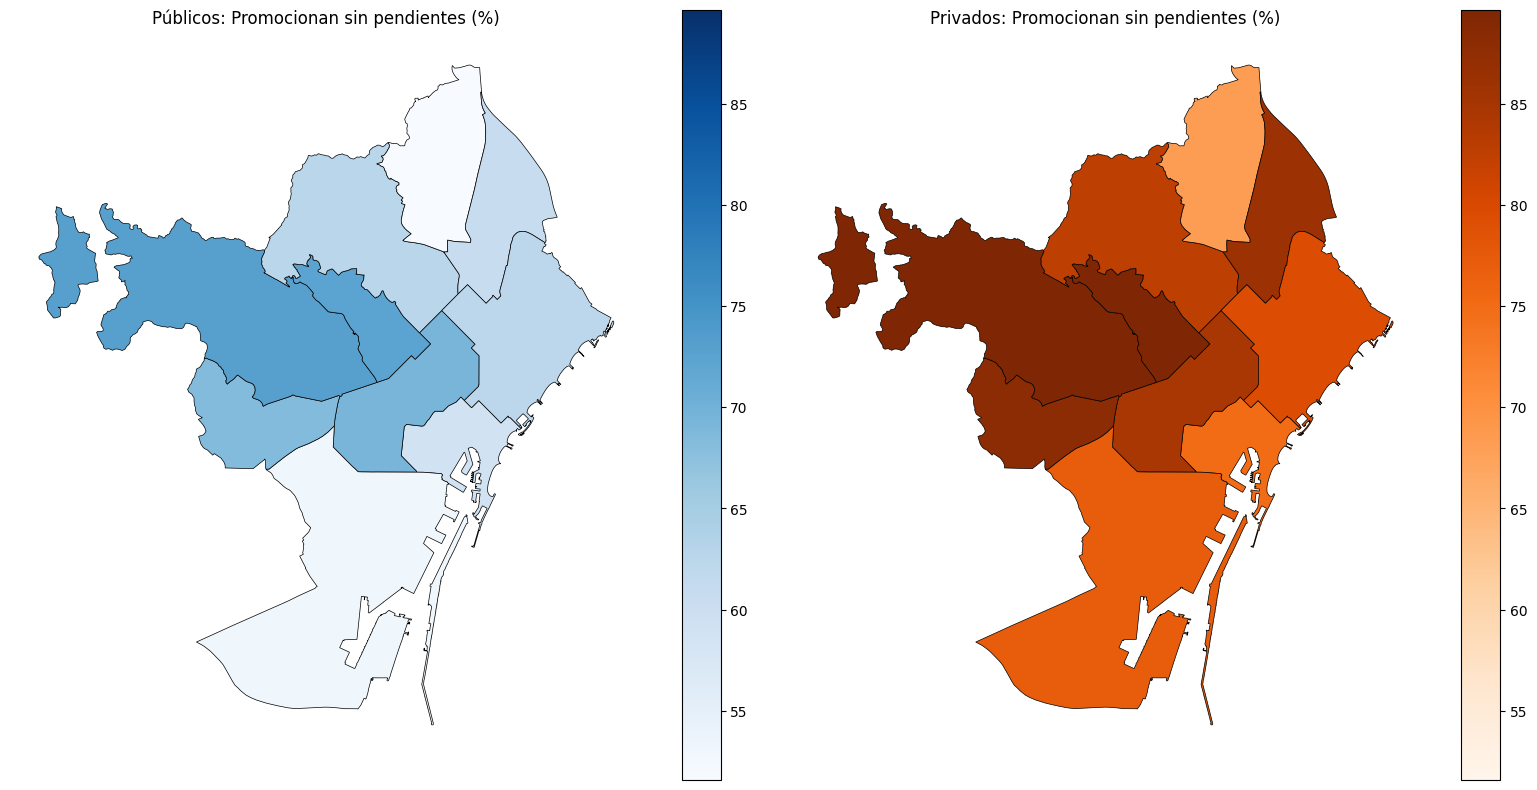

In [ ]:


publicos = df_resultados_distrito[df_resultados_distrito["Naturalesa"] == "PÚBLIC"]
privados = df_resultados_distrito[df_resultados_distrito["Naturalesa"] == "PRIVAT"]

# Convertir columnas clave a int si fuera necesario
publicos["Codi districte"] = publicos["Codi districte"].astype(int)
privados["Codi districte"] = privados["Codi districte"].astype(int)

publicos_psp = publicos[publicos["Resultat de l'avaluació"] == "PROMOCIONEN SENSE PENDENTS"]
privados_psp = privados[privados["Resultat de l'avaluació"] == "PROMOCIONEN SENSE PENDENTS"]


# Convertir clave del geojson
df_bcn_disctricts["Codi_Districte"] = df_bcn_disctricts["Codi_Districte"].astype(int)

publicos_idx = publicos_psp.set_index("Codi districte")["porcentaje"]

gdf_publicos = df_bcn_disctricts.copy()
gdf_publicos["porcentaje"] = gdf_publicos["Codi_Districte"].map(publicos_idx)

privados_idx = privados_psp.set_index("Codi districte")["porcentaje"]

gdf_privados = df_bcn_disctricts.copy()
gdf_privados["porcentaje"] = gdf_privados["Codi_Districte"].map(privados_idx)


# ============================================================
# 8. MAPAS
# ============================================================
vmin = min(gdf_publicos["porcentaje"].min(),
           gdf_privados["porcentaje"].min())

vmax = max(gdf_publicos["porcentaje"].max(),
           gdf_privados["porcentaje"].max())


fig, ax = plt.subplots(1, 2, figsize=(16, 8))

# --- Mapa públicos ---
gdf_publicos.plot(
    column="porcentaje",
    cmap="Blues",
    legend=True,
    vmin=vmin,
    vmax=vmax,
    edgecolor="black",
    linewidth=0.5,
    ax=ax[0]
)
ax[0].set_title("Públicos: Promocionan sin pendientes (%)")
ax[0].axis("off")

# --- Mapa privados ---
gdf_privados.plot(
    column="porcentaje",
    cmap="Oranges",
    legend=True,
    vmin=vmin,
    vmax=vmax,
    edgecolor="black",
    linewidth=0.5,
    ax=ax[1]
)
ax[1].set_title("Privados: Promocionan sin pendientes (%)")
ax[1].axis("off")

plt.tight_layout()
plt.show()


C:\Users\anica\AppData\Local\Temp\ipykernel_21748\3169620179.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_publicos["centroid"] = gdf_publicos.geometry.centroid
C:\Users\anica\AppData\Local\Temp\ipykernel_21748\3169620179.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_privados["centroid"] = gdf_privados.geometry.centroid


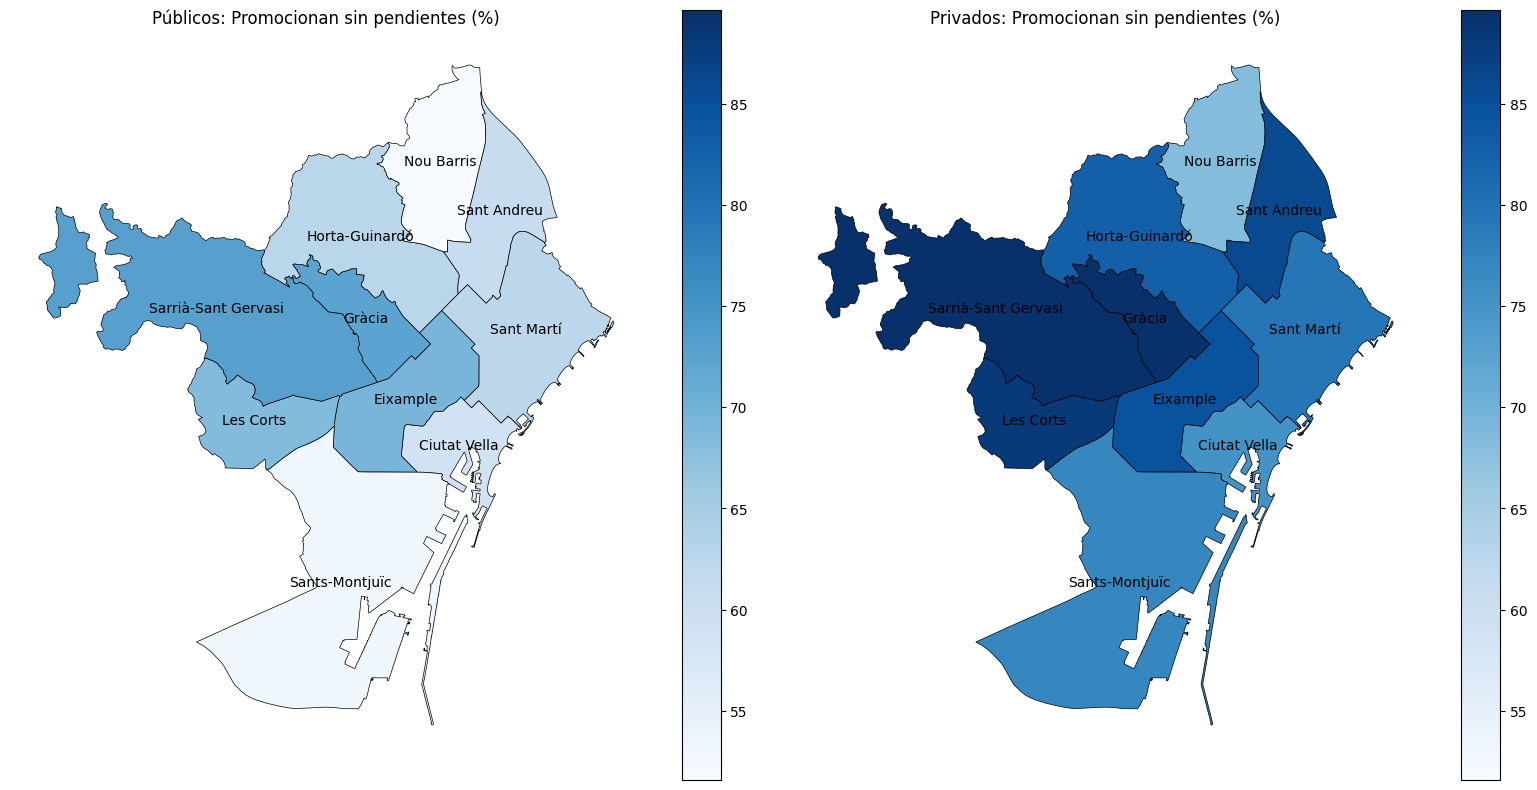

In [40]:


# Crear centroides (GeoPandas puede avisar → es normal)
gdf_publicos["centroid"] = gdf_publicos.geometry.centroid
gdf_privados["centroid"] = gdf_privados.geometry.centroid

# vmin / vmax ya calculados previamente
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

# --- Mapa públicos ---
gdf_publicos.plot(
    column="porcentaje",
    cmap="Blues",
    legend=True,
    vmin=vmin,
    vmax=vmax,
    edgecolor="black",
    linewidth=0.5,
    ax=ax[0]
)
ax[0].set_title("Públicos: Promocionan sin pendientes (%)")
ax[0].axis("off")

# Añadir nombres
for idx, row in gdf_publicos.iterrows():
    ax[0].text(
        row["centroid"].x,
        row["centroid"].y,
        row["nom_districte"],
        fontsize=10,
        ha="center",
        va="center",
        color="black"
    )

# --- Mapa privados ---
gdf_privados.plot(
    column="porcentaje",
    cmap="Blues",
    legend=True,
    vmin=vmin,
    vmax=vmax,
    edgecolor="black",
    linewidth=0.5,
    ax=ax[1]
)
ax[1].set_title("Privados: Promocionan sin pendientes (%)")
ax[1].axis("off")

# Añadir nombres
for idx, row in gdf_privados.iterrows():
    ax[1].text(
        row["centroid"].x,
        row["centroid"].y,
        row["nom_districte"],
        fontsize=10,
        ha="center",
        va="center",
        color="black"
    )

plt.tight_layout()
plt.show()


In [35]:
gdf_publicos


publicos


,Codi districte,Naturalesa,Resultat de l'avaluació,Alumnes avaluats,porcentaje
3,1,PÚBLIC,NO PROMOCIONEN,80,6.015038
4,1,PÚBLIC,PROMOCIONEN AMB PENDENTS,467,35.112782
5,1,PÚBLIC,PROMOCIONEN SENSE PENDENTS,783,58.872180
9,2,PÚBLIC,NO PROMOCIONEN,129,5.408805
10,2,PÚBLIC,PROMOCIONEN AMB PENDENTS,604,25.324948
11,2,PÚBLIC,PROMOCIONEN SENSE PENDENTS,1652,69.266247
15,3,PÚBLIC,NO PROMOCIONEN,196,8.291032
16,3,PÚBLIC,PROMOCIONEN AMB PENDENTS,912,38.578680
17,3,PÚBLIC,PROMOCIONEN SENSE PENDENTS,1256,53.130288
21,4,PÚBLIC,NO PROMOCIONEN,54,4.218750


In [19]:
df_barris

df1_merged = df_barris.merge(df_district_barri, on="BARRI_BCN", how="left")

df_lloguer_district = (
    df1_merged
    .groupby("Districte")["LLOGUER"]
    .mean()
    .reset_index()
)

df_final = df_bcn_filtered.merge(df_lloguer_district, on="Districte", how="left")

df_final


,Sexe,Resultat,Alumnes avaluats,Districte,LLOGUER
0,DONA,PROMOCIONEN AMB PENDENTS,1,CIUTAT VELLA,1028.299454
1,DONA,PROMOCIONEN SENSE PENDENTS,13,CIUTAT VELLA,1028.299454
2,HOME,PROMOCIONEN AMB PENDENTS,3,CIUTAT VELLA,1028.299454
3,HOME,PROMOCIONEN SENSE PENDENTS,14,CIUTAT VELLA,1028.299454
4,DONA,PROMOCIONEN AMB PENDENTS,3,CIUTAT VELLA,1028.299454
...,...,...,...,...,...
1197,DONA,PROMOCIONEN AMB PENDENTS,114,SANT MARTÍ,1136.358554
1198,DONA,PROMOCIONEN SENSE PENDENTS,351,SANT MARTÍ,1136.358554
1199,HOME,NO PROMOCIONEN,76,SANT MARTÍ,1136.358554
1200,HOME,PROMOCIONEN AMB PENDENTS,180,SANT MARTÍ,1136.358554


In [43]:
# Filtramos solo los que promocionan sin pendientes
df_pct_dist = (
    df_bcn_filtered.groupby("Districte").apply(
        lambda x: pd.Series({
            "total": x["Alumnes avaluats"].sum(),
            "promocionen_sense": x.loc[x["Resultat"] == "PROMOCIONEN SENSE PENDENTS", "Alumnes avaluats"].sum()
        })
    )
    .reset_index()
)

df_pct_dist["pct_promocionen_sense"] = (
    df_pct_dist["promocionen_sense"] / df_pct_dist["total"] * 100
)

df_barris_full = df_barris.merge(df_district_barri, on="BARRI_BCN")

df_barris_full = df_barris_full.merge(
    df_pct_dist[["Districte", "pct_promocionen_sense"]],
    on="Districte",
    how="left"
)



df_barris_full


C:\Users\anica\AppData\Local\Temp\ipykernel_52136\1829268052.py:3: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_bcn_filtered.groupby("Districte").apply(


,ID,BARRI,BARRI_BCN,CONTRAC,CONT1000H,VARCONTR,TRAMLLOG,LLOGUER,VARLLOG,LLOGTRIM,SUPMITJ,PREUM2,PREUM2TRIM,GEOMETRIA,Districte,pct_promocionen_sense
0,1,1,el Raval,555,21.983315,-9.016393,> 850 i <= 1000 euros/mes,944.205604,-4.555778,969.902984,60.693694,16.335153,16.626306,MULTIPOLYGON (((430607.335454264 4581881.57694...,CIUTAT VELLA,59.527972
1,2,2,el Barri Gòtic,269,19.092396,7.171315,> 1000 euros/mes,1205.260818,-1.030824,1276.712366,85.072727,16.485631,16.341041,MULTIPOLYGON (((431641.334436453 4581405.51038...,CIUTAT VELLA,59.527972
2,3,3,la Barceloneta,209,21.227406,88.288288,> 850 i <= 1000 euros/mes,902.107273,-14.397992,956.745773,45.227273,22.322604,22.387558,MULTIPOLYGON (((433088.289657605 4581798.87002...,CIUTAT VELLA,59.527972
3,17,17,Sants - Badal,251,19.207092,-5.283019,> 850 i <= 1000 euros/mes,926.416375,-4.633878,915.222826,58.722222,16.029918,16.406279,MULTIPOLYGON (((427385.147094413 4580381.23113...,SANTS - MONTJUÏC,62.233802
4,18,18,Sants,445,19.861598,-8.811475,> 850 i <= 1000 euros/mes,982.919348,-4.791220,1003.903860,64.510204,15.865071,16.106829,MULTIPOLYGON (((428338.31375162 4581328.092342...,SANTS - MONTJUÏC,62.233802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,68,68,el Poblenou,286,15.372903,-12.804878,> 1000 euros/mes,1165.961748,-7.392132,1192.638156,66.317829,18.165205,18.296693,MULTIPOLYGON (((434080.370452822 4582886.99018...,SANT MARTÍ,67.409285
69,69,69,Diagonal Mar i el Front Marítim del Poblenou,100,15.015238,-29.078014,> 1000 euros/mes,1725.708800,32.843503,1817.318654,87.461538,21.815672,22.894746,MULTIPOLYGON (((434942.39399708 4583968.355315...,SANT MARTÍ,67.409285
70,70,70,el Besòs i el Maresme,153,9.536785,56.122449,<= 750 euros/mes,717.511895,-18.806616,722.026400,60.978261,12.878175,12.380359,MULTIPOLYGON (((434942.39399708 4583968.355315...,SANT MARTÍ,67.409285
71,71,71,Provençals del Poblenou,191,14.713487,13.690476,> 1000 euros/mes,1061.899267,-6.878598,1145.021333,73.870370,16.475348,15.938421,MULTIPOLYGON (((434130.822881437 4584774.14668...,SANT MARTÍ,67.409285


In [46]:
df_pct_dist

,Districte,total,promocionen_sense,pct_promocionen_sense
0,CIUTAT VELLA,2288,1362,59.527972
1,EIXAMPLE,7850,6012,76.585987
2,GRÀCIA,3361,2699,80.303481
3,HORTA - GUINARDÓ,5904,4381,74.203930
4,LES CORTS,5079,4081,80.350463
5,NOU BARRIS,5635,3289,58.367347
6,SANT ANDREU,5866,4312,73.508353
7,SANT MARTÍ,7496,5053,67.409285
8,SANTS - MONTJUÏC,4414,2747,62.233802
9,SARRIÀ - SANT GERVASI,9574,8153,85.157719


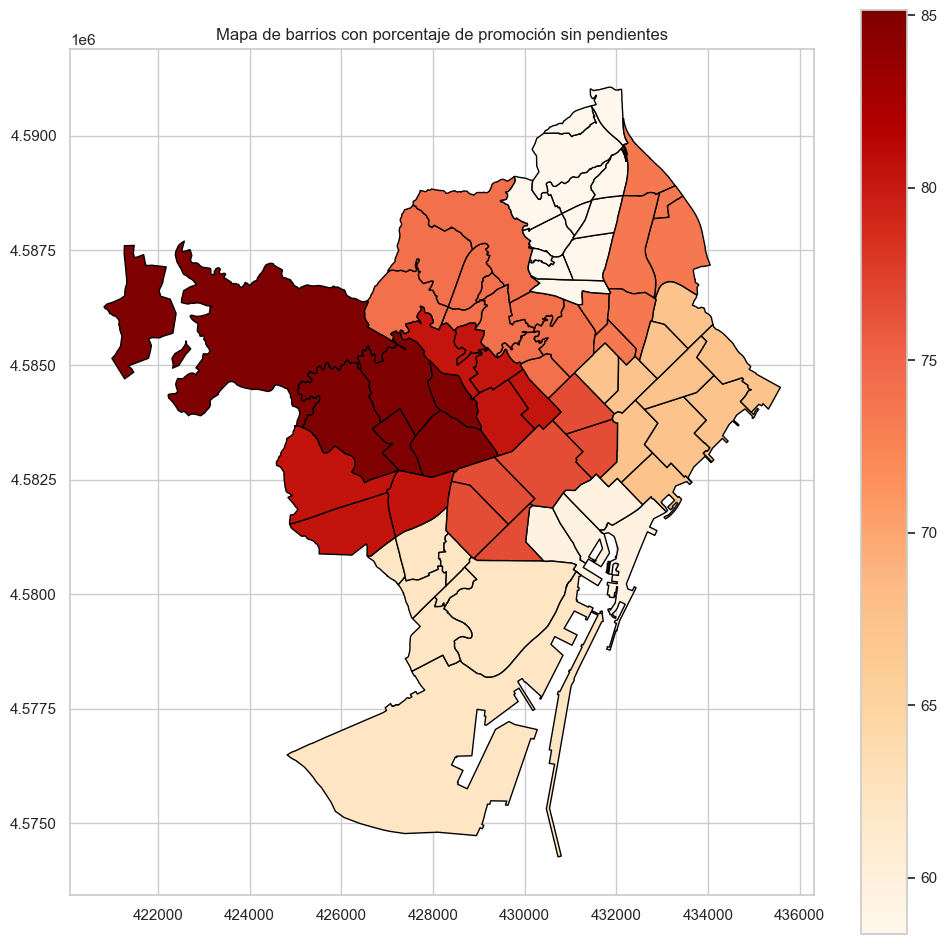

In [45]:
from shapely import wkt

if isinstance(df_barris_full["GEOMETRIA"].iloc[0], str):
    df_barris_full["GEOMETRIA"] = df_barris_full["GEOMETRIA"].apply(wkt.loads)
# Mantener solo geometrías válidas
df_barris_full = df_barris_full[df_barris_full["GEOMETRIA"].notna()]
df_barris_full = df_barris_full[df_barris_full["GEOMETRIA"].apply(lambda x: x.is_valid)]
import geopandas as gpd

gdf_barris = gpd.GeoDataFrame(df_barris_full, geometry="GEOMETRIA")

# Asignar CRS
gdf_barris = gdf_barris.set_crs(epsg=3857)  # si tus coordenadas están en metros
# O si están en lat/lon: epsg=4326

fig, ax = plt.subplots(figsize=(12,12))
gdf_barris.plot(column="pct_promocionen_sense", cmap="OrRd", legend=True, edgecolor="black", ax=ax)
plt.title("Mapa de barrios con porcentaje de promoción sin pendientes")
plt.show()